# 08. 문서 유사도

p522(541)

In [1]:
import warnings
warnings.filterwarnings('ignore')

<br>

## 8.1 문서 유사도 측정 방법 - 코사인 유사도

- 문서와 문서 간의 유사도 비교는 일반적으로 **코사인 유사도(Cosine Similarity)**를 사용
- 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 **상호 방향성이 얼마나 유사한지**에 기반함
- 즉, 코사인 유사도는 두 벡터 사이의 **사잇각**을 구해서 얼마나 유사한 지 수치로 적용한 것

<img src="images/ch08/08/img001.jpg" width="300px"/>

<br>

## 8.2 두 벡터 사잇각

- 두 벡터의 사잇각에 따라서 상호 관계는 다음과 같은 관계를 가질 수 있다.
  - 유사한 관계
  - 관련이 없는 관계
  - 반대 관계

<img src="images/ch08/08/img002.jpg" width="600px"/>

<br>

### 8.2.1 두 벡터의 코사인 값

- 두 벡터 A와 B의 코사인 값은 다음 식으로 구할 수 있음
- 두 벡터 A와 B의 내적 값($A * B$)  
: 두 벡터의 크기($||A||$, $||B||$)를 곱한 값에 코사인 각도 값($cos \theta$)을 곱한 것

$$
A * B = ||A|| ||B|| cos \theta
$$

- 따라서 유사도 $cos \theta$ 는 다음과 같이 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것이다.
- 즉, 내적 결과를 총 벡터 크기로 **정규화(L2 Norm)**한 것

$$
similarity = cos \theta = {A \cdot B \over ||A|| ||B|| } = { \sum_{i=1}^n A_i B_i \over \sqrt{\sum_{i=1}^n A^2_i} \sqrt{\sum_{i=1}^n B^2_i} }
$$

<br>

### 8.2.2 코사인 유사도가 문서의 유사도 비교에 많이 사용되는 이유

- 문서를 피처 벡터화 변환하면 차원이 매우 많은 **희소 행렬**이 되기 쉽다.
- 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(ex. 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉽다.
- 또한 문서가 매우 긴 경우 단어의 빈도수가 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없다.
  - A 문서에서 '머신러닝' 이라는 단어가 5번 언급
  - B 문서에서는 3번 언급
  - 그렇다고 해서 A 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 쉽게 판단해서는 안된다.
  - A 문서가 B 문서보다 10배 이상 크다면 오히려 B 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 판단할 수 있다.

<br>

### 8.2.3 문서 유사도를 코사인 유사도 기반으로 도출

- 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 `cos_similarity()` 함수 작성

In [1]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

<br>

- `doc_list`로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


<br>

- 반환된 행렬은 희소 행렬이므로 앞에서 작성한 `cos_similarity()` 함수의 인자인 `array`로 만들기 위해 **밀집 행렬**로 변환한 뒤 다시 각각을 배열로 변환한다.
- `feature_vect_dense[0]`은 `doc_list` 첫 번째 문서의 피처 벡터화이다.
- `feature_vect_dense[1]`은 `doc_list` 두 번째 문서의 피처 벡터화이다.

- 위에서 작성한 `cos_similarity()` 함수를 이용해 두 개 문서의 유사도를 측정

In [4]:
type(feature_vect_simple)

scipy.sparse.csr.csr_matrix

In [5]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()
type(feature_vect_dense)

numpy.matrix

In [6]:
# 첫 번째 문장과 두 번쨰 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번쨰 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


$\Rightarrow$ **첫 번째 문장과 두 번째 문장의 코사인 유사도 : 0.402**

<br>

- 첫 번째 문장과 세 번째 문장의 유사도 측정

In [7]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )

similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404


$\Rightarrow$ **첫 번째 문장과 세 번째 문장의 코사인 유사도 : 0.404**

<br>

- 두 번째 문장과 세 번째 문장의 유사도 측정

In [8]:
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )

similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 2, 문장 3 Cosine 유사도: 0.456


$\Rightarrow$ **두 번째 문장과 세 번째 문장의 코사인 유사도 : 0.456**

<br>

### 8.2.4 `sklearn.metrics.pairwise.cosine_similarity`

- 사이킷런은 코사인 유사도를 측정하기 위해 `sklearn.metrics.pairwise.cosine_similarity` API를 제공
- 이를 이용해 앞 예제의 문서 유사도를 측정

- `cosine_similarity()` 함수는 두 개의 입력 파라미터를 받는다.
- 첫 번째 파라미터 : 비교 기준이 되는 문서의 피처 행렬
- 두 번째 파라미터 : 비교되는 문서의 피처 행렬

- `cosine_similarity()`는 희소 행렬, 밀집 행렬 모두 가능
- 행렬 또는 배열 모두 가능
- 따라서 앞에서 만든 `cos_similarity()` 함수와 같이 별도의 변환 작업이 필요 없음

- 첫 번째 문서와 비교해 바로 자신 문서인 첫 번째 문서, 그리고 두 번째, 세 번째 문서의 유사도를 측정

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


$\Rightarrow$ `1.` : 비교 기준인 첫 번째 문서 자신에 대한 유사도 값  
$\Rightarrow$ `0.40207758` : 첫 번째 문서와 두 번째 문서의 유사도 값  
$\Rightarrow$ `0.40425045` : 첫 번째 문서와 세 번째 문서의 유사도 값

<br>

- 자기 자신과의 유사도 값을 보지 않을려면ㅁ 비교 대상에서 `feature_vect[1:]`을 이용해 비교 기준 문서를 제외하면 된다.

In [12]:
 similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


<br>

- `cosine_similarity()`는 쌍으로(pair) 코사인 유사도 값을 제공할 수 있다.
- 모든 개별 문서에 쌍으로 코사인 유사도 값을 계산
  - 1 번째 문서와 2, 3 번째 문서의 코사인 유사도
  - 2 번째 문서와 1, 3 번째 문서의 코사인 유사도
  - 3 번째 문서와 1, 2 번째 문서의 코사인 유사도
  - 위의 코사인 유사도 값들을 `ndarray` 형태로 제공

In [14]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape: ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape:  (3, 3)


- `cosine_similarity()`의 반환 값은 `(3,3)` 형태의 `ndarray`
  - 첫 번째 로우 : 1번 문서와 2, 3번째 문서의 코사인 유사도
  - 두 번째 로우 : 2번 문서와 1, 3번째 문서의 코사인 유사도
  - 세 번째 로우 : 3번 문서와 1, 2번째 문서의 코사인 유사도

<br>

## 8.3 Opinion Review 데이터 세트를 이용한 문서 유사도 측정

- 앞 절의 문서 군집화에서 사용한 Opinion Review 데이터 세트를 이용해 이들 문서 간의 유사도를 측정
- 다시 데이터 세트를 새롭게 DataFrame으로 로드하고 문서 군집화를 적용

In [22]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = "E:/shkim/pythonRepository/ml-definitive-guide/data/OpinosisDataset/topics"
#path = "C:/shkim/jupyter notebook/ml-definitive-guide/data/OpinosisDataset/topics"
all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename_ = filename_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very acc..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my ...
3,battery-life_ipod_nano_8gb,short battery life I moved up from a...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 2..."


In [25]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [26]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

c:\users\krx-mktinfo\.conda\envs\python36\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<br>

- 이전 절에서 해당 문서의 군집화는 전자제품, 호텔, 자동차를 주제로 군집화됨
- 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 확인

- 문서를 피처 벡터화해 변환하면 문서 내 단어(Word)에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화된다.
- 이렇게 각 문서가 피처 벡터화된 데이터를 `cosine_similarity()`를 이용해 상호 비교해 유사도를 확인

- 호텔을 주제로 군집화된 데이터를 먼저 추출
- 이 데이터에 해당하는 `TfidfVectorizer`의 데이터를 추출
- 호텔 군집화 데이터를 기반으로 별도의 TF-IDF 벡터화를 수행하지 않고, 바로 위에서 `TfidfVectorizer`로 만들어진 데이터에서 그대로 추출

- DataFrame 객체 변수인 `document_df`에서 먼저 호텔로 군집화된 문서의 인덱스 추출
- 추출된 인덱스를 그대로 이용해 `TfidfVectorizer` 객체 변수인 `feature_vect`에서 호텔로 군집화된 문서의 피처 벡터를 추출

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터 : 호텔로 군집화된 데이터
# DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print('호텔로 군집화된 문서들의 DataFrame Index: \n', hotel_indexes, '\n')

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 : ', comparison_docname, ' 와 타 문서 유사도 #####')

"""
- document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
- 이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
"""
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]],
                                    feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index: 
 Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64') 

##### 비교 기준 문서명 :  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도 #####
[[1.         0.05907195 0.05404862 0.03739629 0.06629355 0.06734556
  0.04017338 0.13113702 0.41011101 0.3871916  0.57253197 0.10600704
  0.13058128 0.1602411  0.05539602 0.05839754]]


<br>

- 단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도 유사도를 가지는 지 이해하기 어려움
- 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 정렬하고 시각화

- `cosine_similarity()`는 쌍 형태의 `ndarray`를 반환
- 이를 판다스 인덱스로 이용하기 위해 `reshape(-1)`로 차원을 변경

Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

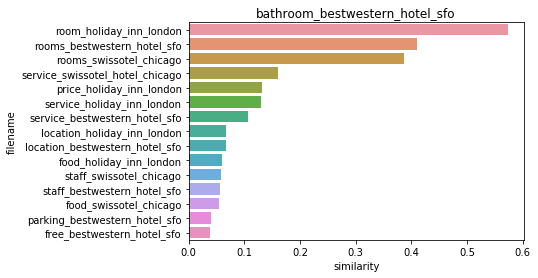

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

plt.show()

- 첫 번째 문서인 샌프란시스코의 베스트 웨스턴 호텔 화장실 리뷰(BestWestern Hotel Bathroom Review)인 bathroom_bestwestern_hotel_sfo와 가장 비슷한 문서는 room_holiday_inn_london이다.  
(약 0.572의 코사인 유사도 값을 나타냄)